In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [4]:
session = tf.InteractiveSession()

(1, 3, 3, 1)


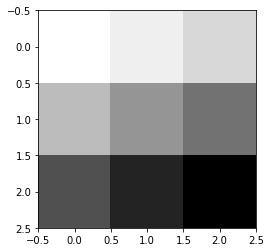

In [7]:
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

#### (1, 3, 3, 1)
#### 1: instance 갯수, 즉 1 개의 이미지만 가지고 사용한다.
#### 3: x축 이미지
#### 3: y축 이미지 => 즉, 3 x 3 이미지를 사용한다.
#### 1: 색깔 갯수,

## Padding = VALID

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


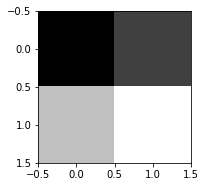

In [43]:
print("image.shape:", image.shape)

weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
# (2, 2, 1, 1) => 2x2 이미지로, 1개 color, 1개 filter만 사용하겠음.
print("weight.shape:", weight.shape)

# conv2d(input, filter, strides, padding, ...)
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1)
    plt.imshow(one_img.reshape(2,2), cmap='gray')

## Padding = SAME
### input가 같은 갯수의 output이 생김

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 1)
conv2d_img.shape: (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


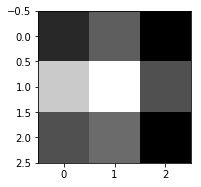

In [34]:
print("image.shape:", image.shape)

weight = tf.constant([[[[1.]], [[1.]]],
                      [[[1.]], [[1.]]]])
print("weight.shape:", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(3,3), cmap='gray')

## 3 filters(2,2,1,3)

image.shape: (1, 3, 3, 1)
weight.shape: (2, 2, 1, 3)
conv2d_img.shape: (1, 3, 3, 3)
0 [[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
1 [[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
2 [[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


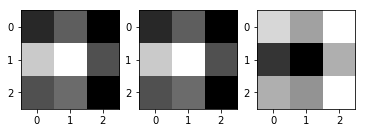

In [41]:
print("image.shape:", image.shape)

weight = tf.constant([[[[1.,10.,-1.]], [[1.,10.,-1.]]],
                      [[[1.,10.,-1.]], [[1.,10.,-1.]]]])
print("weight.shape:", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape:", conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(i, one_img.reshape(3,3))
    plt.subplot(1,3,i+1)
    plt.imshow(one_img.reshape(3,3), cmap='gray')

## Max Pooling

### padding = VALID

In [47]:
image = np.array([[[[4],[3]],
                   [[2],[1]]]], dtype=np.float32)
print("image.shape:", image.shape)

pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='VALID')
print("pool.shape:", pool.shape)
print("pool.eval:", pool.eval())

image.shape: (1, 2, 2, 1)
pool.shape: (1, 1, 1, 1)
pool.eval: [[[[4.]]]]


### padding = SAME
- input  갯수와 output갯수가 같아짐.

In [49]:
image = np.array([[[[4], [3]],
                   [[2], [1]]]], dtype=np.float32)
print("image.shape:", image.shape)

pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], strides=[1,1,1,1], padding='SAME')
print("pool.shape:", pool.shape)
print("pool.eval:", pool.eval())

image.shape: (1, 2, 2, 1)
pool.shape: (1, 2, 2, 1)
pool.eval: [[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## using MNIST 

In [50]:
from tensorflow.examples.tutorials.mnist import input_data

In [51]:
# To solve downloading files.
## https://github.com/tensorflow/tensorflow/issues/10779
## run the /Applications/Python 3.6/Install Certificates.command bash script to install newer certs.
mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)
print(mnist.train.num_examples)

Extracting ../MNIST_data/train-images-idx3-ubyte.gz
Extracting ../MNIST_data/train-labels-idx1-ubyte.gz
Extracting ../MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ../MNIST_data/t10k-labels-idx1-ubyte.gz
55000


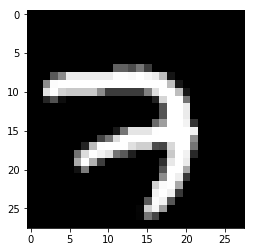

In [55]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

conv2d: Tensor("Conv2D_34:0", shape=(1, 14, 14, 5), dtype=float32)


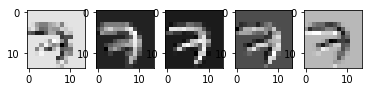

In [75]:
session = tf.InteractiveSession()

# -1: n개의 데이터를 갖고 옴.
img = img.reshape(-1, 28, 28, 1)
filter_count = 5
W1 = tf.Variable(tf.random_normal([3,3,1,filter_count], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')
print("conv2d:", conv2d)

session.run(tf.global_variables_initializer())

conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,filter_count,i+1)
    plt.imshow(one_img.reshape(14,14), cmap='gray')

### MAX POOLING

Tensor("MaxPool_6:0", shape=(1, 7, 7, 5), dtype=float32)


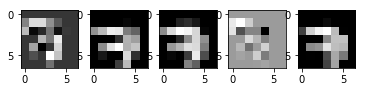

In [73]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1],
                     strides=[1,2,2,1], padding='SAME')
print(pool)

session.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1)
    plt.imshow(one_img.reshape(7,7), cmap='gray')